In [1]:
import strax
import straxen
print(straxen.__file__)
print(straxen.__version__)
print(strax.__version__)
import pandas as pd
pd.options.display.max_colwidth = 100
from tqdm import tqdm
import numpy as np

import numba

from scipy.optimize import curve_fit
from scipy import stats

import matplotlib.pyplot as plt

/home/gvolta/XENONnT/straxen/straxen/__init__.py
0.5.0
0.8.6


In [2]:
st = straxen.contexts.strax_workshop_dali()

In [3]:
st.register(straxen.plugins.led_calibration.LEDCalibration)
st.data_info('led_calibration')

,Field name,Data type,Comment
0,area,int32,Area averaged in integration windows
1,amplitude_led,int32,Amplitude in LED window
2,amplitude_noise,int32,Amplitude in off LED window
3,channel,int16,Channel
4,time,int64,Start time of the interval (ns since unix epoch)
5,dt,int16,Time resolution in ns
6,length,int32,Length of the interval in samples


In [4]:
st.show_config('led_calibration')

,option,default,current,applies_to,help
0,led_window,"(150, 275)",<OMITTED>,"(led_calibration,)",Window (samples) where we expect the signal in LED calibration
1,noise_window,"(0, 125)",<OMITTED>,"(led_calibration,)",Window (samples) to analysis the noise
2,channel_list,"(0, 248)",<OMITTED>,"(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
3,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
4,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
5,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
6,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [5]:
st = st.new_context(config=dict(channel_list=(0,1)))
st.show_config('led_calibration')

,option,default,current,applies_to,help
0,led_window,"(150, 275)",<OMITTED>,"(led_calibration,)",Window (samples) where we expect the signal in LED calibration
1,noise_window,"(0, 125)",<OMITTED>,"(led_calibration,)",Window (samples) to analysis the noise
2,channel_list,"(0, 248)","(0, 1)","(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
3,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
4,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
5,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
6,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [6]:
st.show_config('led_calibration')

,option,default,current,applies_to,help
0,led_window,"(150, 275)",<OMITTED>,"(led_calibration,)",Window (samples) where we expect the signal in LED calibration
1,noise_window,"(0, 125)",<OMITTED>,"(led_calibration,)",Window (samples) to analysis the noise
2,channel_list,"(0, 248)","(0, 1)","(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
3,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
4,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
5,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
6,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [7]:
runs = st.select_runs(run_mode='LED*')

Checking data availability: 100%|██████████| 5/5 [00:42<00:00,  8.57s/it]


In [8]:
runs

,end,livetime,mode,name,number,reader.ini.name,start,tags,trigger.events_built,peaklets_available,records_available,events_available,event_info_available,raw_records_available
121,2018-02-19 10:00:16+00:00,00:08:03,LED_3mus_stable,180219_0952,16979,LED_3mus_stable,2018-02-19 09:52:13+00:00,"gain_step0,_sciencerun2_candidate",196157.0,False,False,False,False,True
122,2018-02-19 10:09:44+00:00,00:08:03,LED_3mus_stable,180219_1001,16980,LED_3mus_stable,2018-02-19 10:01:41+00:00,"gain_step1,_sciencerun2_candidate",196207.0,False,False,False,False,True
123,2018-02-19 10:19:09+00:00,00:08:03,LED_3mus_stable,180219_1011,16981,LED_3mus_stable,2018-02-19 10:11:06+00:00,"gain_step2,_sciencerun2_candidate",194686.0,False,False,False,False,True
124,2018-02-19 10:29:22+00:00,00:08:04,LED_3mus_stable,180219_1021,16982,LED_3mus_stable,2018-02-19 10:21:18+00:00,"gain_step3,_sciencerun2_candidate",196373.0,False,False,False,False,True
125,2018-02-19 10:39:05+00:00,00:08:03,LED_3mus_stable,180219_1030,16983,LED_3mus_stable,2018-02-19 10:31:02+00:00,"gain_step4,_sciencerun2_candidate",195938.0,False,False,False,False,True
126,2018-02-19 10:58:02+00:00,00:08:02,LED_3mus_stable,180219_1049,16985,LED_3mus_stable,2018-02-19 10:50:00+00:00,"spe_topbulk,_sciencerun2_candidate",194366.0,False,False,False,False,True
127,2018-02-19 11:07:24+00:00,00:08:03,LED_3mus_stable,180219_1059,16986,LED_3mus_stable,2018-02-19 10:59:21+00:00,"spe_topring,_sciencerun2_candidate",193050.0,False,False,False,False,True
128,2018-02-19 11:15:31+00:00,00:05:03,LED_7mus_stable,180219_1110,16987,LED_7mus_stable,2018-02-19 11:10:28+00:00,"Afterpulse,_sciencerun2_candidate",46116.0,False,False,False,False,True
129,2018-02-19 11:31:50+00:00,00:15:02,LED_7mus_stable,180219_1116,16988,LED_7mus_stable,2018-02-19 11:16:48+00:00,"Afterpulse,_sciencerun2_candidate",137431.0,False,False,False,False,True


#### Hist of windows integration by led_calibration plugin

In [9]:
data_lc = st.get_array('180219_1001', 'led_calibration', max_workers = 10)

#### Hist of windows integration by raw_records plugin

In [10]:
run_id = '180219_1001'
data_rr = st.get_array(run_id, 'raw_records', max_workers = 10, seconds_range=(0,5))

In [13]:
def get_amplitude(raw_records, led_window=[125, 250], noise_window=[350, 475]):
    '''
    Needed for the SPE computation.
    Take the maximum in two different regions, where there is the signal and where there is not.
    '''
    on = np.zeros((len(raw_records)), dtype=[('channel','int16'),('amplitude_led', '<i4')])
    off = np.zeros((len(raw_records)), dtype=[('channel','int16'),('amplitude_noise', '<i4')])
    i = 0
    for r in raw_records:
        on['amplitude_led'][i] = np.max(r['data'][led_window[0]:led_window[1]])
        on['channel'][i] = r['channel']
        off['amplitude_noise'][i] = np.max(r['data'][noise_window[0]:noise_window[1]])
        off['channel'][i] = r['channel']
        i=i+1
    return on, off

def get_area(raw_records, LED_window=[125, 250]):
    '''
    Needed for the gain computation.
    Sum the data in the defined window to get the area.
    This is done in 6 integration window and it returns the average area.
    '''
    left = LED_window[0]
    end_pos = [LED_window[1]+2*i for i in range(6)]

    Area = np.zeros((len(raw_records)), dtype=[('channel','int16'),('area','float32')])
    for right in end_pos:
        Area['area'] += raw_records['data'][:, left:right].sum(axis=1)
    Area['channel'] = raw_records['channel']
    Area['area'] = Area['area']/float(len(end_pos))
        
    return Area

In [14]:
on, off = get_amplitude(data_rr)
Area = get_area(data_rr)

In [18]:
data_lc

array([( -38,  3, 3, 0, 1519034501000086550, 10, 600),
       ( -33,  4, 5, 1, 1519034501000086550, 10, 600),
       (-164,  3, 3, 0, 1519034501002544130, 10, 600), ...,
       (  81, 61, 4, 0, 1519034983188525290, 10, 600),
       (  16,  5, 5, 0, 1519034983190982870, 10, 600),
       (  76, 52, 6, 0, 1519034983193440450, 10, 600)],
      dtype=[(('Area averaged in integration windows', 'area'), '<i4'), (('Amplitude in LED window', 'amplitude_led'), '<i4'), (('Amplitude in off LED window', 'amplitude_noise'), '<i4'), (('Channel', 'channel'), '<i2'), (('Start time of the interval (ns since unix epoch)', 'time'), '<i8'), (('Time resolution in ns', 'dt'), '<i2'), (('Length of the interval in samples', 'length'), '<i4')])

### Comparison

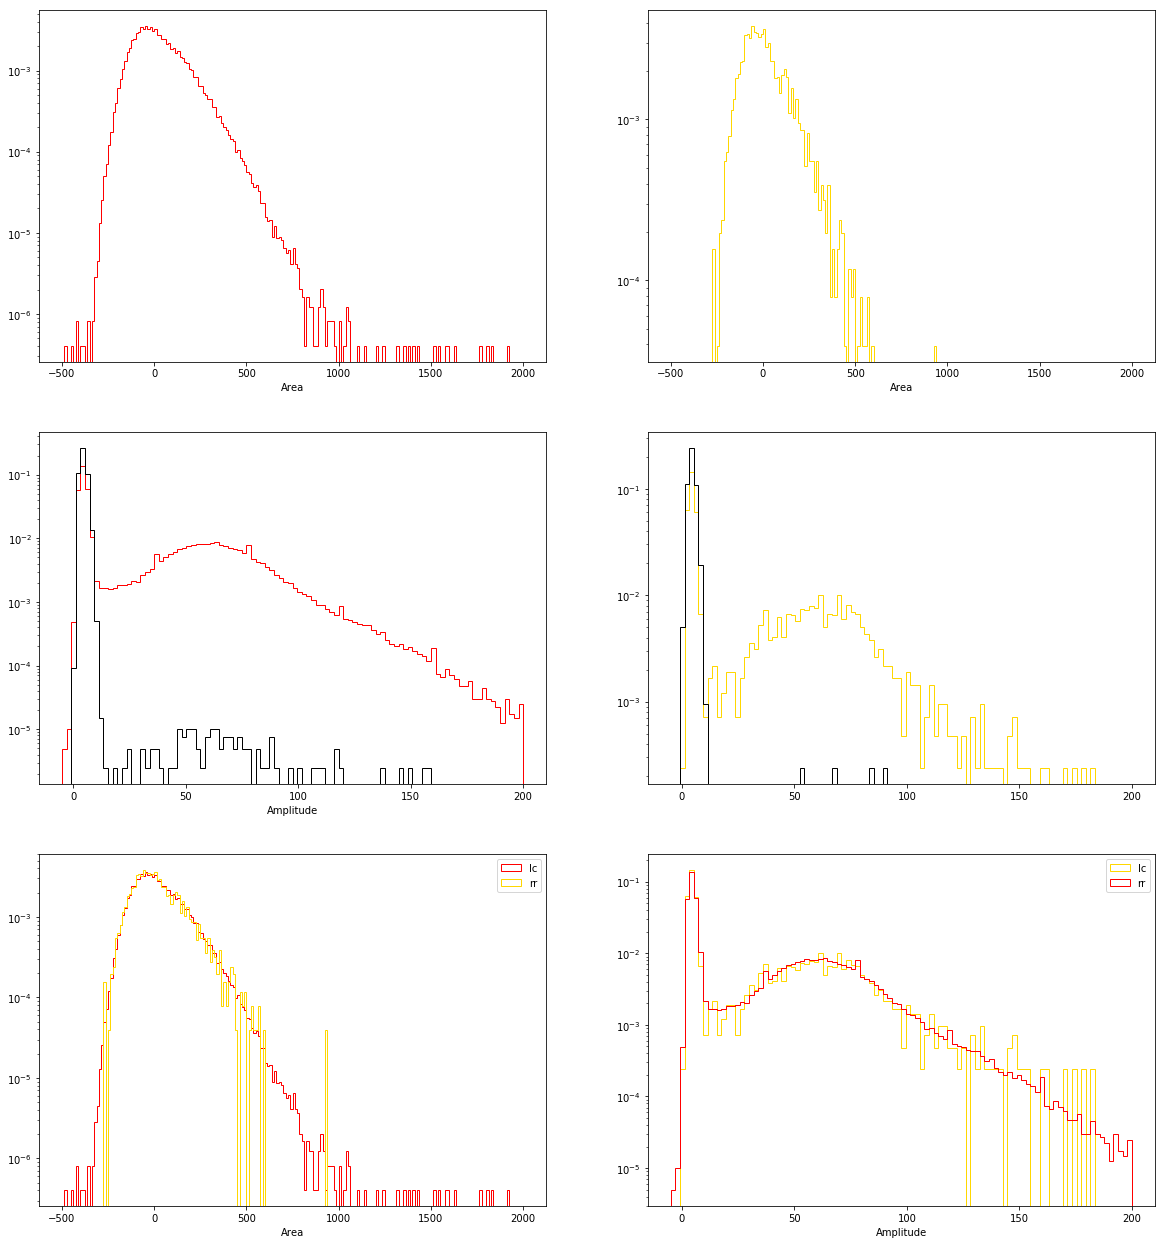

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(20,22))

plt.subplot(321)
plt.hist(data_lc[data_lc['channel']==0]['area'], bins=200, range=(-500, 2000), 
         color='red', histtype='step', density=True, label='lc')
plt.yscale('log')
plt.xlabel('Area')
#plt.title('led_calibration')

plt.subplot(322)
plt.hist(Area[Area['channel']==0]['area'], bins=200, range=(-500, 2000), 
         color='gold', histtype='step', density=True, label='rr')
plt.yscale('log')
plt.xlabel('Area')
#plt.title('raw_records')

plt.subplot(323)
plt.hist(data_lc[data_lc['channel']==0]['amplitude_led'], bins=100, range=(-5, 200), 
         color='red', histtype='step', density=True, label='lc')
plt.hist(data_lc[data_lc['channel']==0]['amplitude_noise'], bins=100, range=(-5, 200), 
         color='black', histtype='step', density=True, label='lc')
plt.yscale('log')
plt.xlabel('Amplitude')

plt.subplot(324)
plt.hist(on[on['channel']==0]['amplitude_led'], bins=100, range=(-5, 200), 
         color='gold', histtype='step', density=True, label='rr')
plt.hist(off[off['channel']==0]['amplitude_noise'], bins=100, range=(-5, 200), 
         color='black', histtype='step', density=True, label='rr')
plt.yscale('log')
#plt.xlabel('Amplitude')

plt.subplot(325)
plt.hist(data_lc[data_lc['channel']==0]['area'], bins=200, range=(-500, 2000), 
         color='red', histtype='step', density=True, label='lc')
plt.hist(Area[Area['channel']==0]['area'], bins=200, range=(-500, 2000), 
         color='gold', histtype='step', density=True, label='rr')
plt.yscale('log')
plt.xlabel('Area')
plt.legend(loc='best')
#plt.title('raw_records')

plt.subplot(326)
plt.hist(on[on['channel']==0]['amplitude_led'], bins=100, range=(-5, 200), 
         color='gold', histtype='step', density=True, label='lc')
plt.hist(data_lc[data_lc['channel']==0]['amplitude_led'], bins=100, range=(-5, 200), 
         color='red', histtype='step', density=True, label='rr')
plt.yscale('log')
plt.xlabel('Amplitude')
plt.legend(loc='best')

plt.show()
plt.tight_layout()